In [62]:
# Design the model
# Make the loss and optimizr
# Training loop
# - forward pass : predict
# - backward pass : the loss with change its gradients
# - update weights : with the gradients of the loss funtion the optimizer will change its parameters (models)

In [63]:
import torch
import torch.nn as nn

In [64]:
import numpy as np

In [65]:
from sklearn import datasets

In [66]:
import matplotlib.pyplot as plt

In [67]:
# Prepare data
X_numpy,y_numpy = datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=42)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
print(y[:5])
y = y.view(y.shape[0],1)
print(y[:5])

tensor([ 62.6872, -23.7640, -25.6868,   7.9365, -15.4755])
tensor([[ 62.6872],
        [-23.7640],
        [-25.6868],
        [  7.9365],
        [-15.4755]])


In [68]:
n_samples,n_features = X.shape

In [69]:
y.shape

torch.Size([100, 1])

In [70]:
# model
output_size = y.shape[1]
model = nn.Linear(n_features,output_size)

In [71]:
# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [72]:
# training loop
num_epochs = 10000

In [73]:
model.to('cuda')
criterion.to('cuda')
X = X.to('cuda')
y = y.to('cuda')

In [74]:
for epoch in range(num_epochs):
    # forward pass and loss
    y_preds = model(X)
    y_preds.to('cuda')
    loss = criterion(y,y_preds)
    # backward pass
    loss.backward()
    # update
    optimizer.step()
    optimizer.zero_grad()
    [w,b] = model.parameters()
    print(w)
    print(loss.item())

Parameter containing:
tensor([[1.3096]], device='cuda:0', requires_grad=True)
2091.33349609375
Parameter containing:
tensor([[2.0630]], device='cuda:0', requires_grad=True)
2032.8485107421875
Parameter containing:
tensor([[2.8039]], device='cuda:0', requires_grad=True)
1976.3165283203125
Parameter containing:
tensor([[3.5324]], device='cuda:0', requires_grad=True)
1921.6710205078125
Parameter containing:
tensor([[4.2488]], device='cuda:0', requires_grad=True)
1868.847900390625
Parameter containing:
tensor([[4.9532]], device='cuda:0', requires_grad=True)
1817.7852783203125
Parameter containing:
tensor([[5.6459]], device='cuda:0', requires_grad=True)
1768.423583984375
Parameter containing:
tensor([[6.3271]], device='cuda:0', requires_grad=True)
1720.7049560546875
Parameter containing:
tensor([[6.9969]], device='cuda:0', requires_grad=True)
1674.57373046875
Parameter containing:
tensor([[7.6555]], device='cuda:0', requires_grad=True)
1629.97607421875
Parameter containing:
tensor([[8.3032]

In [53]:
preds = model(X)

In [54]:
preds = preds.detach() # required_grad becomes False so the gradient wont update

In [45]:
preds = preds.numpy()

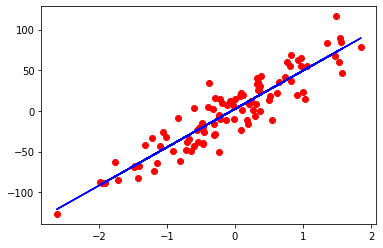

In [50]:
plt.plot(X_numpy,y_numpy,'ro')
plt.plot(X_numpy,preds,'b')
plt.show();